## Import Packages

In [2]:
import numpy as np
import scipy as sp
import scipy.stats as stt
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['font.size'] = 18

mpl_color = plt.rcParams['axes.prop_cycle'].by_key()['color']

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## The Leaky Gaussian Kernel (LGK) Loss

In [3]:
from scipy.integrate import quad

def lgk_loss(y1, y2, h=1e-1, alpha=1e-6):
    return -np.exp(-0.5*(y1 - y2)**2 / h**2) / np.sqrt(2*np.pi) / h + alpha*np.abs(y1-y2)

def loss_landscape(y, data, loss=lgk_loss):
    return np.mean([loss(y, val) for val in data], axis=0)

def true_loss_landscape(y, pdf, loss=lgk_loss,
                        a=-20, b=20):
    res = []
    for val in y:
        res.append(quad(lambda z: pdf(z)*loss(val, z), a, b)[0])
    return np.array(res)

### Demonstrate the loss landscape for different hyper-parameters

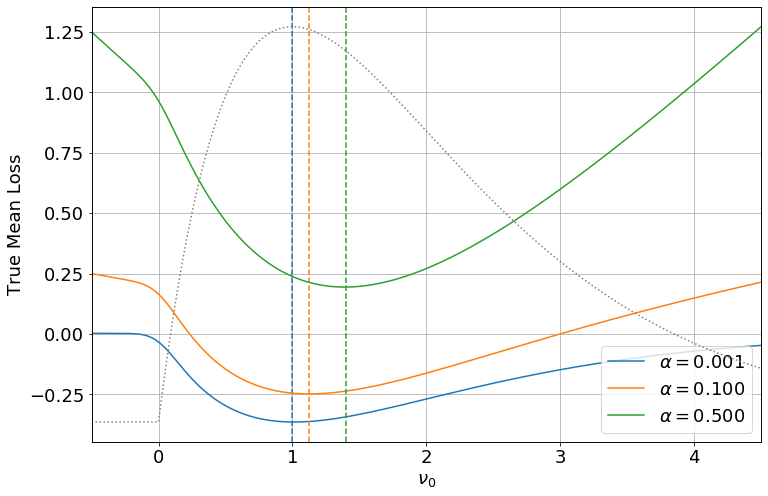

In [4]:
from itertools import product

gamma_dist = stt.gamma(a=2)

y_range = np.linspace(-0.5, 4.5, 201)

h = 0.1
alpha_list = [0.001, 0.1, 0.5]



fig, ax1 = plt.subplots()

for i, alpha in enumerate(alpha_list):
    true_loss = true_loss_landscape(y_range, gamma_dist.pdf, lambda y1, y2: lgk_loss(y1, y2, h, alpha))
    ax1.plot(y_range, true_loss,
             label=r"$\alpha=%.3f$" % alpha, c=mpl_color[i])
    ax1.axvline(y_range[np.argmin(true_loss)],
                linestyle='--', c=mpl_color[i])

ax2 = ax1.twinx()
for tic in ax2.yaxis.get_major_ticks():
    tic.tick1line.set_visible(False)
    tic.tick2line.set_visible(False)
    tic.label1.set_visible(False)
    tic.label2.set_visible(False)
ax2.plot(y_range, gamma_dist.pdf(y_range),
         c='gray', linestyle=':', label="PDF")

ax1.set_xlim([y_range[0], y_range[-1]])
# ax1.set_ylim([0.6, 1.2])
ax1.set_xlabel(r"$\nu_0$")
ax1.set_ylabel("True Mean Loss")

ax1.legend(loc='lower right')
ax1.grid()
plt.savefig("./fig/lgk_loss_alpha.png",
            bbox_inches="tight", dpi=400)
plt.show()

### Demonstrate the loss landscape for various distributions

* Exponential Distribution

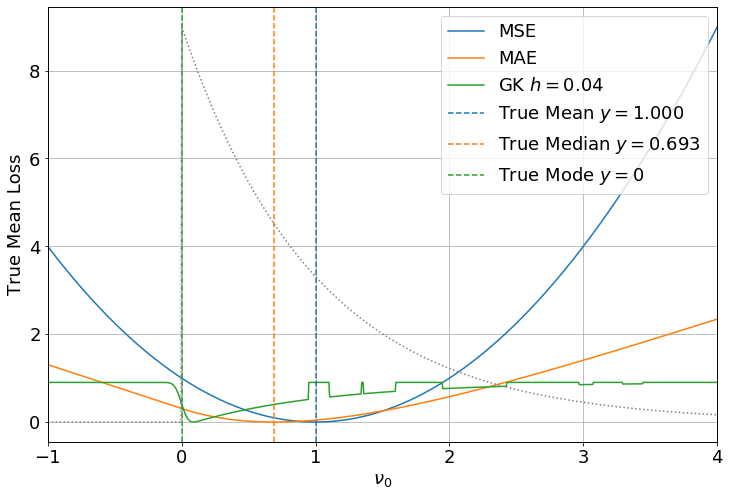

In [8]:
exp_dist = stt.expon()

y_range = np.linspace(-1, 4, 1001)

h = 0.04

loss_functions = [
    lambda y1, y2: (y1-y2)**2,
    lambda y1, y2: np.abs(y1-y2),
    lambda y1, y2: lgk_loss(y1, y2, h=h, alpha=0)
]

loss_names = [
    "MSE", "MAE", r"GK $h=%.2f$" % h
]

fig, ax1 = plt.subplots()

for i, loss in enumerate(loss_functions):
    true_loss = true_loss_landscape(y_range, exp_dist.pdf, loss)
    ax1.plot(y_range, true_loss - np.amin(true_loss),
             label=loss_names[i], c=mpl_color[i])

ax1.axvline(exp_dist.mean(), linestyle='--', c=mpl_color[0],
            label="True Mean $y=%.3f$" % exp_dist.mean())
ax1.axvline(exp_dist.median(), linestyle='--', c=mpl_color[1],
            label="True Median $y=%.3f$" % exp_dist.median())
ax1.axvline(0, linestyle='--', c=mpl_color[2],
            label="True Mode $y=0$")

ax2 = ax1.twinx()
for tic in ax2.yaxis.get_major_ticks():
    tic.tick1line.set_visible(False)
    tic.tick2line.set_visible(False)
    tic.label1.set_visible(False)
    tic.label2.set_visible(False)
ax2.plot(y_range, exp_dist.pdf(y_range),
         c='gray', linestyle=':', label="PDF")

ax1.set_xlim([-1, 4])
ax1.set_xlabel(r"$\nu_0$")
ax1.set_ylabel("True Mean Loss")

ax1.legend(loc='upper right')
ax1.grid()

plt.savefig("./fig/gk_loss_exp_dist.png",
            bbox_inches="tight", dpi=400)

plt.show()

* Crystal Ball (CB) Distribution

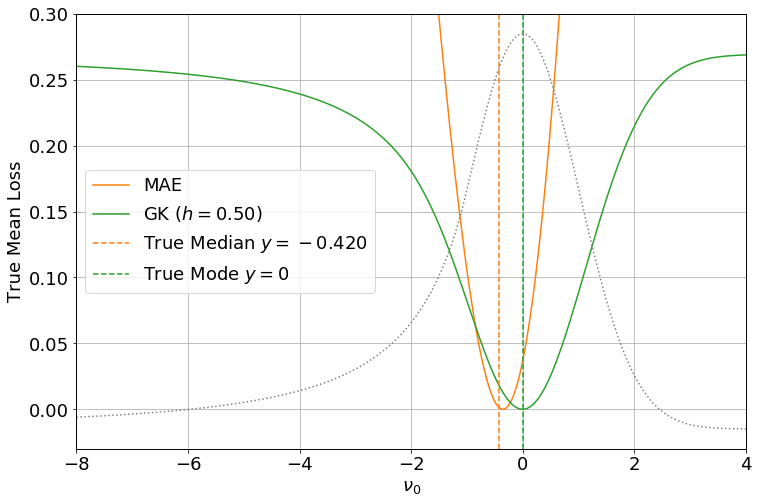

In [9]:
CB_dist = stt.crystalball(beta=1, m=2)

y_range = np.linspace(-8, 5, 300)

h = 0.5

loss_functions = [
    lambda y1, y2: np.abs(y1-y2),
    lambda y1, y2: lgk_loss(y1, y2, h=h, alpha=0)
]

loss_names = [
    "MAE", r"GK ($h=%.2f$)" % h
]

fig, ax1 = plt.subplots()

for i, loss in enumerate(loss_functions):
    true_loss = true_loss_landscape(y_range, CB_dist.pdf, loss)
    ax1.plot(y_range, true_loss - np.amin(true_loss),
             label=loss_names[i], c=mpl_color[i+1])

ax1.axvline(CB_dist.median(), linestyle='--', c=mpl_color[1],
            label="True Median $y=%.3f$" % CB_dist.median())
ax1.axvline(0, linestyle='--', c=mpl_color[2],
            label="True Mode $y=0$")

ax2 = ax1.twinx()
for tic in ax2.yaxis.get_major_ticks():
    tic.tick1line.set_visible(False)
    tic.tick2line.set_visible(False)
    tic.label1.set_visible(False)
    tic.label2.set_visible(False)
ax2.plot(y_range, CB_dist.pdf(y_range),
         c='gray', linestyle=':', label="PDF")

ax1.set_xlim([-8, 4])
ax1.set_ylim([-0.03, 0.3])
ax1.set_xlabel(r"$\nu_0$")
ax1.set_ylabel("True Mean Loss")

ax1.legend(loc='center left')
ax1.grid()

plt.savefig("./fig/gk_loss_CB_dist.png",
            bbox_inches="tight", dpi=400)

plt.show()

* Gamma Distribution

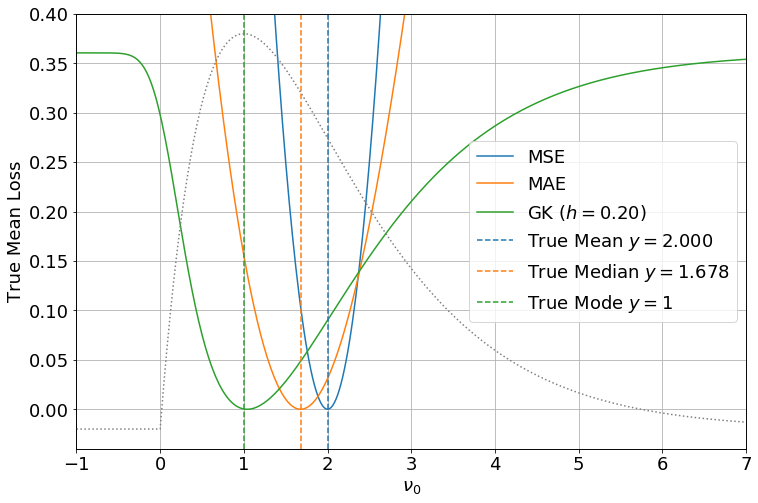

In [10]:
gamma_dist = stt.gamma(a=2)

y_range = np.linspace(-1, 7, 401)

h = 0.2

loss_functions = [
    lambda y1, y2: (y1-y2)**2,
    lambda y1, y2: np.abs(y1-y2),
    lambda y1, y2: lgk_loss(y1, y2, h=h, alpha=0)
]

loss_names = [
    "MSE", "MAE", r"GK ($h=%.2f$)" % h
]

fig, ax1 = plt.subplots()

for i, loss in enumerate(loss_functions):
    true_loss = true_loss_landscape(y_range, gamma_dist.pdf, loss)
    ax1.plot(y_range, true_loss - np.amin(true_loss),
             label=loss_names[i], c=mpl_color[i])

ax1.axvline(gamma_dist.mean(), linestyle='--', c=mpl_color[0],
            label="True Mean $y=%.3f$" % gamma_dist.mean())
ax1.axvline(gamma_dist.median(), linestyle='--', c=mpl_color[1],
            label="True Median $y=%.3f$" % gamma_dist.median())
ax1.axvline(1, linestyle='--', c=mpl_color[2],
            label="True Mode $y=1$")

ax2 = ax1.twinx()
for tic in ax2.yaxis.get_major_ticks():
    tic.tick1line.set_visible(False)
    tic.tick2line.set_visible(False)
    tic.label1.set_visible(False)
    tic.label2.set_visible(False)
ax2.plot(y_range, gamma_dist.pdf(y_range),
         c='gray', linestyle=':', label="PDF")

ax1.set_xlim([-1, 7])
ax1.set_ylim([-0.04, 0.4])
ax1.set_xlabel(r"$\nu_0$")
ax1.set_ylabel("True Mean Loss")

ax1.legend(loc='center right')
ax1.grid()

plt.savefig("./fig/gk_loss_gamma_dist.png",
            bbox_inches="tight", dpi=400)

plt.show()